# Úkol č. 1 - redukce dimenzionality a binární klasifikace

  * **Deadline je 22. 4. 2024, 23:59:59**, pokud odevzdáte úkol do 29. 4. 2024, 23:59:59, budete penalizování -12 body, pozdější odevzdání je bez bodu.
  * V rámci tohoto úkolu se musíte vypořádat s vysokou dimenzí problému a poté úspěšně aplikovat vhodný klasfikační model.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budou strhávány body.

## Zdroj dat

 * Zdrojem dat jsou soubory `train.csv` a `evaluate.csv`.
 * Jedná se o obrázky 28x28 pixelů ve stupních šedi, které byly získány z [Fashion Mnist datasetu](https://www.kaggle.com/datasets/zalando-research/fashionmnist).
 * Soubor `train.csv` obsahuje trénovací data.
 * Cílová (vysvětlovaná) proměnná se jmenuje **label**.
 * Soubor `evaluate.csv` obsahuje testovací data bez hodnot skutečných labelů.

## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **25 bodů**:
  * V notebooku načtěte data ze souboru `train.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování, porovnávání modelů a následnou predikci výkonnosti finálního modelu.
  * Proveďte základní průzkum dat a svá pozorování diskutujte. Některé obrázky také zobrazte.
  * Postupně aplikujte modely **SVM**, **naivní Bayesův klasifikátor** a **LDA**, přičemž pro každý z nich:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Vyberte si hlavní hyperparametry k ladění (pokud model má hyperparametry) a najděte jejich nejlepší hodnoty.
      * Experimentujte se standardizací/normalizací dat.
      * U SVM vyzkoušejte alespoň dvě různé jádrové funkce.
      * Získané výsledky vždy řádně okomentujte.


  * Postupně aplikujte metody redukce dimenzionality PCA a LLE, přičemž pro každou z nich: 
      * Zopakujte předchozí kroky a pokuste modely vylepšit
      * Zkoumejte jaká dimenze je z hlediska výkonnosti finálního modelu nejlepší.
      * Získané výsledky vždy řádně okomentujte.
    
  * Ze všech zkoušených možností vyberte finální model a odhadněte, jakou přesnost můžete očekávat na nových datech, která jste doposud neměli k dispozici.
  
  * Nakonec načtěte vyhodnocovací data ze souboru`evaluate.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do sloupce **label** a identifikátory do sloupce **ID**. Tento soubor též odevzdejte (uložte do projektu vedle notebooku).
   
   * Ukázka prvních řádků souboru `results.csv`:
  
```
ID,label
0,0
1,1
...
```

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML2/homeworks/index.html.
  * Vytvořte i csv soubor `results.csv` s predikcemi a uložte ho v rámci projektu vedle ipython notebooku.

# Nacteni dat a nahlednuti na data
### Nejprve si data nactu a vhodne pojmenuji data set. Pote so podivam jestli jsou data plne vyplnene a jake hodnoty obsahuji. Podivam se jak jsou vyplnene, vykreslim  si je a budu zkoumat jejich ruzne aspekty.

In [77]:
import pandas as pd
data_frame = pd.read_csv('train.csv')

In [78]:
data_frame.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,1,0,0,0,0,0,0,0,0,0,...,208,122,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,75,11,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,106,103,76,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 14.4 MB


In [80]:
#Spocitame kolik mame unikatnich labeles a jejich pocet
count_uniq = len(data_frame['label'].unique())
sum_uniq = data_frame['label'].value_counts()
print('Pocet unikatnich label: ',count_uniq)
print('Pocet prvku pro kazdy unikatni: ',sum_uniq)

Pocet unikatnich label:  2
Pocet prvku pro kazdy unikatni:  label
0    1238
1    1162
Name: count, dtype: int64


In [81]:
is_null_sum = data_frame.isnull().values.any().sum()
print(is_null_sum)

0


In [82]:
data_frame.describe(include='all')

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,2400.000000,2400.0,2400.0,2400.0,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,...,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.00000,2400.000000,2400.000000,2400.0
mean,0.484167,0.0,0.0,0.0,0.002083,0.098333,0.302500,0.846250,2.256250,6.025000,...,65.379583,26.975417,9.651667,3.307500,1.249167,0.460417,0.11250,0.038750,0.010833,0.0
std,0.499853,0.0,0.0,0.0,0.067682,1.895871,5.014792,9.262155,15.491603,25.358871,...,66.874570,49.060424,30.540885,18.067668,11.443957,6.363199,2.82043,1.742655,0.530723,0.0
min,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
25%,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
50%,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
75%,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,114.250000,35.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
max,1.000000,0.0,0.0,0.0,3.000000,69.000000,188.000000,189.000000,219.000000,243.000000,...,248.000000,252.000000,246.000000,212.000000,179.000000,176.000000,88.00000,85.000000,26.000000,0.0


# Rozdeleni dat
### Rozdelim data na trenovaci, validacni a testovaci obdobne jako jsme to delali na cviceni. 

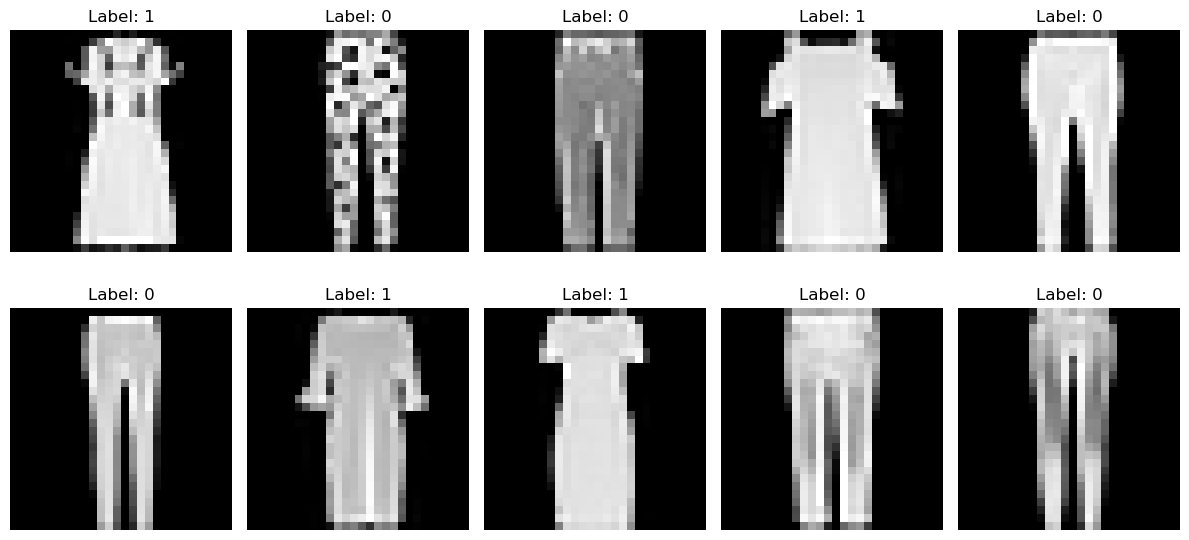

In [83]:
from sklearn.model_selection import train_test_split

Xtrain, Xrest, ytrain, yrest = train_test_split(data_frame.drop(columns=['label']), data_frame.label, test_size=0.4, random_state = 42)

Xtest, Xval, ytest, yval = train_test_split(Xrest, yrest, test_size=0.6, random_state = 42)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(Xtrain.iloc[i].values.reshape(28, 28), cmap="gray")
    plt.title(f"Label: {ytrain.iloc[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

Podivame se na zakladni normalizaci, muzeme hodnty pixelu (0 do 255) vydelit 255

In [84]:
Xtrain_simple_norm = Xtrain.astype('float32')
Xtrain_simple_norm /= 255.0


Xval_simple_norm = Xval.astype('float32')
Xval_simple_norm /= 255.0


Xtest_simple_norm = Xtest.astype('float32')
Xtest_simple_norm /= 255.0

ytrain_simple_norm = ytrain.astype('float32')
ytrain_simple_norm /= 255.0

yval_simple_norm = yval.astype('float32')
yval_simple_norm /= 255.0

ytest_simple_norm = ytest.astype('float32')
ytest_simple_norm /= 255.0


print(f"Trenovaci rozměry, X: {Xtrain_simple_norm.shape}, y: {ytrain_simple_norm.shape}")
print(f"Validacni rozměry, X: {Xval_simple_norm.shape}, y: {yval_simple_norm.shape}")
print(f"Testovaci rozměry, X: {Xtest_simple_norm.shape}, y: {ytest_simple_norm.shape}")


Trenovaci rozměry, X: (1440, 784), y: (1440,)
Validacni rozměry, X: (576, 784), y: (576,)
Testovaci rozměry, X: (384, 784), y: (384,)


In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(Xtrain)

Xtrain_scaled = scaler.transform(Xtrain)
Xval_scaled = scaler.transform(Xval)
Xtest_scaled = scaler.transform(Xtest)

print(f"Trenovaci rozměry, X: {Xtrain_scaled.shape}, y: {ytrain.shape}")
print(f"Validacni rozměry, X: {Xval_scaled.shape}, y: {yval.shape}")
print(f"Testovaci rozměry, X: {Xtest_scaled.shape}, y: {ytest.shape}")


Trenovaci rozměry, X: (1440, 784), y: (1440,)
Validacni rozměry, X: (576, 784), y: (576,)
Testovaci rozměry, X: (384, 784), y: (384,)


Zacneme se SVM. SVM spustim na neupravene data, pak na data co jsem si pomoci StandardScaler upravil tak jak bylo na cviceni, kdzy jsme delali SVM a pote na datech, ktere jsem normalizoval do hodnot 0 az 1 z puvodnich 0 az 255, ale tato normalizace je podle me zbytecna na techto datech, uvidime jak se vysledek bude list od neupravenych datech, pote budu moct vyvodit vysledky.

In [86]:
import time  
from sklearn.svm import SVC  
from sklearn.model_selection import GridSearchCV  
from sklearn import metrics  
  
parameters = {'C': [0.1, 1, 10,20], 'kernel': ['linear', 'rbf','poly','sigmoid'], 'degree':[1,2,3,4,5],'gamma':['scale','auto']}  
  
# Vytvoření instance SVC  
clf = SVC()  
  
grid_search = GridSearchCV(clf, parameters)  
  
st = time.time()  
grid_search.fit(Xtrain, ytrain)  
et = time.time()  
print(f"SVM - natrénován za {et - st : .03f}s")  
  
best_clf_SVM_data = grid_search.best_estimator_  
best_params_SVM_data = grid_search.best_params_  
  
st = time.time()  
train_accuracy = metrics.accuracy_score(ytrain, best_clf_SVM_data.predict(Xtrain))  
val_accuracy = metrics.accuracy_score(yval, best_clf_SVM_data.predict(Xval))  
et = time.time()  
print('Accuracy score (train): {0:.6f}'.format(train_accuracy))  
print('Accuracy score (validation): {0:.6f}'.format(val_accuracy))  
print(f"Evaluace trvala {et - st : .03f}s")  
print("Nejlepší kombinace parametrů: ", best_params_SVM_data)



st = time.time()
grid_search.fit(Xtrain_scaled, ytrain)
et = time.time()
print(f"SVM scaled data - natrénován za {et - st : .03f}s")


best_clf_SVM_scaled = grid_search.best_estimator_
best_params_SVM_scaled = grid_search.best_params_


st = time.time()
train_accuracy = metrics.accuracy_score(ytrain, best_clf_SVM_scaled.predict(Xtrain_scaled))
val_accuracy = metrics.accuracy_score(yval, best_clf_SVM_scaled.predict(Xval_scaled))
et = time.time()
print('Accuracy score (train): {0:.6f}'.format(train_accuracy))
print('Accuracy score (validation): {0:.6f}'.format(val_accuracy))
print(f"Evaluace trvala {et - st : .03f}s")
print("Nejlepší kombinace parametrů: ", best_params_SVM_scaled)


st = time.time()
grid_search.fit(Xtrain_simple_norm, ytrain)
et = time.time()
print(f"SVM - natrénován za {et - st : .03f}s")

best_clf_SVM_norm = grid_search.best_estimator_
best_params_SVM_norm = grid_search.best_params_

st = time.time()
train_accuracy = metrics.accuracy_score(ytrain, best_clf_SVM_norm.predict(Xtrain_simple_norm))
val_accuracy = metrics.accuracy_score(yval, best_clf_SVM_norm.predict(Xval_simple_norm))
et = time.time()
print('Accuracy score (train): {0:.6f}'.format(train_accuracy))
print('Accuracy score (validation): {0:.6f}'.format(val_accuracy))
print(f"Evaluace trvala {et - st : .03f}s")
print("Nejlepší kombinace parametrů: ", best_params_SVM_norm)


SVM - natrénován za  101.833s
Accuracy score (train): 0.999306
Accuracy score (validation): 0.970486
Evaluace trvala  0.055s
Nejlepší kombinace parametrů:  {'C': 20, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
SVM scaled data - natrénován za  64.963s
Accuracy score (train): 0.999306
Accuracy score (validation): 0.977431
Evaluace trvala  0.106s
Nejlepší kombinace parametrů:  {'C': 20, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
SVM - natrénován za  76.375s
Accuracy score (train): 0.999306
Accuracy score (validation): 0.970486
Evaluace trvala  0.059s
Nejlepší kombinace parametrů:  {'C': 20, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}


Vidime, ze muj predpoklad, ze normalizace dat v tomto pripade nepomohla vysledky jsou stejne. Niceme vidime ze data upravena pomoci StandardScaler nam pri pouziti SVM davaji nejlepsi vysledek, zaroven jsme si ulozili i parametry a nejlepsi model.

Dale se podivame na Naivniho Bayese. Vyzkousim nejprve na nasich vsech datech GaussianNB a pote na "nejlepsich" datech provedu Bernouli

In [87]:
import time  
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV  
from sklearn import metrics  
  
parameters = {'var_smoothing': [1e-9, 1e-8, 1e-7,1e-6,1e-5,1e-4,1e-3,1e-2]}

clf = GaussianNB()

grid_search = GridSearchCV(clf, parameters)

st = time.time()
grid_search.fit(Xtrain, ytrain)
et = time.time()
print(f"Naivní Bayes - natrénován za {et - st : .03f}s")

best_clf_NB_data = grid_search.best_estimator_
best_params_NB_data = grid_search.best_params_

st = time.time()
train_accuracy = metrics.accuracy_score(ytrain, best_clf_NB_data.predict(Xtrain))
val_accuracy = metrics.accuracy_score(yval, best_clf_NB_data.predict(Xval))
et = time.time()
print('Accuracy score (train): {0:.6f}'.format(train_accuracy))
print('Accuracy score (validation): {0:.6f}'.format(val_accuracy))
print(f"Evaluace trvala {et - st : .03f}s")
print("Nejlepší kombinace parametrů: ", best_params_NB_data)



st = time.time()
grid_search.fit(Xtrain_scaled, ytrain)
et = time.time()
print(f"Naivní Bayes - natrénován za {et - st : .03f}s")

best_clf_NB_scaled = grid_search.best_estimator_
best_params_NB_scaled = grid_search.best_params_

st = time.time()
train_accuracy = metrics.accuracy_score(ytrain, best_clf_NB_scaled.predict(Xtrain_scaled))
val_accuracy = metrics.accuracy_score(yval, best_clf_NB_scaled.predict(Xval_scaled))
et = time.time()
print('Accuracy score (train): {0:.6f}'.format(train_accuracy))
print('Accuracy score (validation): {0:.6f}'.format(val_accuracy))
print(f"Evaluace trvala {et - st : .03f}s")
print("Nejlepší kombinace parametrů: ", best_params_NB_scaled)


st = time.time()
grid_search.fit(Xtrain_simple_norm, ytrain)
et = time.time()
print(f"Naivní Bayes - natrénován za {et - st : .03f}s")

best_clf_NB_norm = grid_search.best_estimator_
best_params_NB_norm = grid_search.best_params_

st = time.time()
train_accuracy = metrics.accuracy_score(ytrain, best_clf_NB_norm.predict(Xtrain_simple_norm))
val_accuracy = metrics.accuracy_score(yval, best_clf_NB_norm.predict(Xval_simple_norm))
et = time.time()
print('Accuracy score (train): {0:.6f}'.format(train_accuracy))
print('Accuracy score (validation): {0:.6f}'.format(val_accuracy))
print(f"Evaluace trvala {et - st : .03f}s")
print("Nejlepší kombinace parametrů: ", best_params_NB_norm)

Naivní Bayes - natrénován za  0.789s
Accuracy score (train): 0.933333
Accuracy score (validation): 0.927083
Evaluace trvala  0.021s
Nejlepší kombinace parametrů:  {'var_smoothing': 0.01}
Naivní Bayes - natrénován za  0.439s
Accuracy score (train): 0.941667
Accuracy score (validation): 0.939236
Evaluace trvala  0.015s
Nejlepší kombinace parametrů:  {'var_smoothing': 0.01}
Naivní Bayes - natrénován za  0.784s
Accuracy score (train): 0.933333
Accuracy score (validation): 0.927083
Evaluace trvala  0.021s
Nejlepší kombinace parametrů:  {'var_smoothing': 0.01}


Vidime, ze opet normalizace nemela vliv na vysledek. Opet nam data upravena pomoci StandardScaler dala lepsi vysledek a my ho mame dopredu ulozeny.
Dale a prozkoumam dalsi moznost u Bayese... Vyuziji MultinomilNB a BernouliNB. Budu ted pouze pracovat na datech upravene pres StandardScaler.

In [88]:
clf = BernoulliNB( force_alpha = True)
parameters = {'alpha': [0.000001,0.0001,1]}

grid_search = GridSearchCV(clf, parameters)

st = time.time()
grid_search.fit(Xtrain_scaled, ytrain)
et = time.time()
print(f"Naivní Bayes - natrénován za {et - st : .03f}s")

best_clf_NB_Bernouli_scaled = grid_search.best_estimator_
best_params_NB_Bernouli_scaled = grid_search.best_params_

st = time.time()
train_accuracy = metrics.accuracy_score(ytrain, best_clf_NB_Bernouli_scaled.predict(Xtrain_scaled))
val_accuracy = metrics.accuracy_score(yval, best_clf_NB_Bernouli_scaled.predict(Xval_scaled))
et = time.time()
print('Accuracy score (train): {0:.6f}'.format(train_accuracy))
print('Accuracy score (validation): {0:.6f}'.format(val_accuracy))
print(f"Evaluace trvala {et - st : .03f}s")
print("Nejlepší kombinace parametrů: ", best_params_NB_Bernouli_scaled)

Naivní Bayes - natrénován za  0.189s
Accuracy score (train): 0.913194
Accuracy score (validation): 0.918403
Evaluace trvala  0.013s
Nejlepší kombinace parametrů:  {'alpha': 1e-06}


Vysledek je takovy, ze pouziti BernoulliNB nam dalo horsi vysledek nez GaussianNB, jeste vyzkousim MultinomialNB a vyvedu zaver.

Podivame se na Confusion matrix na nejlepsich modelech pouzitych pri delani naivniho bayese.

In [89]:
from sklearn.metrics import confusion_matrix
yval_pred_Bernouli = best_clf_NB_Bernouli_scaled.predict(Xval_scaled)

cm = confusion_matrix(yval,yval_pred_Bernouli)
print(cm)

yval_pred_Gaussian = best_clf_NB_scaled.predict(Xval_scaled)

cm = confusion_matrix(yval,yval_pred_Gaussian)
print(cm)



[[266  31]
 [ 16 263]]
[[272  25]
 [ 10 269]]


Dale se podivame na praci s LDA, ocekvama podobne vysledky jako u NB. Budu uz pouze pracovat s datama upravenyma pomoci StandardScaler

In [90]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import warnings
warnings.filterwarnings('ignore')


parameters = {'solver': ['svd', 'lsqr', 'eigen']}

clf = LinearDiscriminantAnalysis()

grid_search = GridSearchCV(clf, parameters)

st = time.time()
grid_search.fit(Xtrain_scaled, ytrain)
et = time.time()
print(f"LDA - natrénován za {et - st : .03f}s")

best_clf_LDA_scaled = grid_search.best_estimator_
best_params_LDA_scaled = grid_search.best_params_

st = time.time()
train_accuracy = metrics.accuracy_score(ytrain, best_clf_LDA_scaled.predict(Xtrain_scaled))
val_accuracy = metrics.accuracy_score(yval, best_clf_LDA_scaled.predict(Xval_scaled))
et = time.time()
print('Accuracy score (train): {0:.6f}'.format(train_accuracy))
print('Accuracy score (validation): {0:.6f}'.format(val_accuracy))
print(f"Evaluace trvala {et - st : .03f}s")
print("Nejlepší kombinace parametrů: ", best_params_LDA_scaled)


LDA - natrénován za  1.982s
Accuracy score (train): 0.995833
Accuracy score (validation): 0.946181
Evaluace trvala  0.005s
Nejlepší kombinace parametrů:  {'solver': 'svd'}


Vidime, ze zatim model na Scaled datech pomoci SVM byl nejvice uspesny. LDA se mu nejvice priblizila ale mene.

Ted se presouvame na druhou polovinu ukolu, vice prace s daty.


Nejprve pouzijieme PCA. U SVM modelu vyzkousim opet na Scaled datech a na vice jadrovych funkci.


In [91]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
x_pca_train = pca.fit_transform(Xtrain_scaled)
x_pca_val = pca.transform(Xval_scaled)

parameters = {'C': [0.1, 1, 10,20], 'kernel': ['linear', 'rbf','poly','sigmoid'], 'degree':[1,2,3,4,5],'gamma':['scale','auto']}

clf = SVC()

grid_search = GridSearchCV(clf, parameters)

st = time.time()
grid_search.fit(x_pca_train, ytrain)
et = time.time()
print(f"SVM PCA - natrénován za {et - st : .03f}s")

best_clf_SVM_data_pca = grid_search.best_estimator_
best_params_SVM_data_pca = grid_search.best_params_

st = time.time()
train_accuracy = metrics.accuracy_score(ytrain, best_clf_SVM_data_pca.predict(x_pca_train))
val_accuracy = metrics.accuracy_score(yval, best_clf_SVM_data_pca.predict(x_pca_val))
et = time.time()
print('Accuracy score (train): {0:.6f}'.format(train_accuracy))
print('Accuracy score (validation): {0:.6f}'.format(val_accuracy))
print(f"Evaluace trvala {et - st : .03f}s")
print("Nejlepší kombinace parametrů: ", best_params_SVM_data_pca)

SVM PCA - natrénován za  27.749s
Accuracy score (train): 0.999306
Accuracy score (validation): 0.979167
Evaluace trvala  0.030s
Nejlepší kombinace parametrů:  {'C': 0.1, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}


Vidime, ze PCA lehce pomohlo, ale nezvysilo to o moc vysledek. Dale aplikujeme podobny postup in na nase nejlepsi LDA a Bayese

In [92]:
clf = LinearDiscriminantAnalysis()
parameters = {'solver': ['svd', 'lsqr', 'eigen']}

grid_search = GridSearchCV(clf, parameters)

st = time.time()
grid_search.fit(x_pca_train, ytrain)
et = time.time()
print(f"LDA PCA - natrénován za {et - st : .03f}s")

best_clf_LDA_scaled_pca = grid_search.best_estimator_
best_params_LDA_scaled_pca = grid_search.best_params_

st = time.time()
train_accuracy = metrics.accuracy_score(ytrain, best_clf_LDA_scaled_pca.predict(x_pca_train))
val_accuracy = metrics.accuracy_score(yval, best_clf_LDA_scaled_pca.predict(x_pca_val))
et = time.time()
print('Accuracy score (train): {0:.6f}'.format(train_accuracy))
print('Accuracy score (validation): {0:.6f}'.format(val_accuracy))
print(f"Evaluace trvala {et - st : .03f}s")
print("Nejlepší kombinace parametrů: ", best_params_LDA_scaled_pca)

LDA PCA - natrénován za  0.156s
Accuracy score (train): 0.983333
Accuracy score (validation): 0.967014
Evaluace trvala  0.002s
Nejlepší kombinace parametrů:  {'solver': 'svd'}


In [93]:
parameters = {'var_smoothing': [1e-9, 1e-8, 1e-7,1e-6,1e-5,1e-4,1e-3,1e-2]}

clf = GaussianNB()

grid_search = GridSearchCV(clf, parameters)

st = time.time()
grid_search.fit(x_pca_train, ytrain)
et = time.time()
print(f"Naivní Bayes Gaussian PCA - natrénován za {et - st : .03f}s")

best_clf_NB_data_pca = grid_search.best_estimator_
best_params_NB_data_pca = grid_search.best_params_

st = time.time()
train_accuracy = metrics.accuracy_score(ytrain, best_clf_NB_data_pca.predict(x_pca_train))
val_accuracy = metrics.accuracy_score(yval, best_clf_NB_data_pca.predict(x_pca_val))
et = time.time()
print('Accuracy score (train): {0:.6f}'.format(train_accuracy))
print('Accuracy score (validation): {0:.6f}'.format(val_accuracy))
print(f"Evaluace trvala {et - st : .03f}s")
print("Nejlepší kombinace parametrů: ", best_params_NB_data_pca)

Naivní Bayes Gaussian PCA - natrénován za  0.088s
Accuracy score (train): 0.727778
Accuracy score (validation): 0.722222
Evaluace trvala  0.002s
Nejlepší kombinace parametrů:  {'var_smoothing': 1e-09}


Vidime, ze PCA nejvice pomohla u SVM. Ted se podivame na vysledky s pouzitim LLE. Pro zkraceni prace pouzyiji podobny postup.

In [94]:
from sklearn.manifold import LocallyLinearEmbedding

LLE = LocallyLinearEmbedding(n_components=15, n_neighbors=10)
x_lle_train = LLE.fit_transform(Xtrain_scaled)
x_lle_val = LLE.transform(Xval_scaled)

parameters = {'C': [0.1, 1, 10,20], 'kernel': ['linear', 'rbf','poly','sigmoid'], 'degree':[1,2,3,4,5],'gamma':['scale','auto']}

clf = SVC()

grid_search = GridSearchCV(clf, parameters)

st = time.time()
grid_search.fit(x_lle_train, ytrain)
et = time.time()
print(f"SVM LLE - natrénován za {et - st : .03f}s")

best_clf_SVM_data_lle = grid_search.best_estimator_
best_params_SVM_data_lle = grid_search.best_params_

st = time.time()
train_accuracy = metrics.accuracy_score(ytrain, best_clf_SVM_data_lle.predict(x_lle_train))
val_accuracy = metrics.accuracy_score(yval, best_clf_SVM_data_lle.predict(x_lle_val))
et = time.time()
print('Accuracy score (train): {0:.6f}'.format(train_accuracy))
print('Accuracy score (validation): {0:.6f}'.format(val_accuracy))
print(f"Evaluace trvala {et - st : .03f}s")
print("Nejlepší kombinace parametrů: ", best_params_SVM_data_lle)

clf = LinearDiscriminantAnalysis()
parameters = {'solver': ['svd', 'lsqr', 'eigen']}

grid_search = GridSearchCV(clf, parameters)

st = time.time()
grid_search.fit(x_lle_train, ytrain)
et = time.time()
print(f"LDA LLE - natrénován za {et - st : .03f}s")

best_clf_LDA_scaled_lle = grid_search.best_estimator_
best_params_LDA_scaled_lle = grid_search.best_params_

st = time.time()
train_accuracy = metrics.accuracy_score(ytrain, best_clf_LDA_scaled_lle.predict(x_lle_train))
val_accuracy = metrics.accuracy_score(yval, best_clf_LDA_scaled_lle.predict(x_lle_val))
et = time.time()
print('Accuracy score (train): {0:.6f}'.format(train_accuracy))
print('Accuracy score (validation): {0:.6f}'.format(val_accuracy))
print(f"Evaluace trvala {et - st : .03f}s")
print("Nejlepší kombinace parametrů: ", best_params_LDA_scaled_lle)



parameters = {'var_smoothing': [1e-9, 1e-8, 1e-7,1e-6,1e-5,1e-4,1e-3,1e-2]}

clf = GaussianNB()

grid_search = GridSearchCV(clf, parameters)

st = time.time()
grid_search.fit(x_lle_train, ytrain)
et = time.time()
print(f"Naivní Bayes Gaussian LLE - natrénován za {et - st : .03f}s")

best_clf_NB_data_lle = grid_search.best_estimator_
best_params_NB_data_lle = grid_search.best_params_

st = time.time()
train_accuracy = metrics.accuracy_score(ytrain, best_clf_NB_data_lle.predict(x_lle_train))
val_accuracy = metrics.accuracy_score(yval, best_clf_NB_data_lle.predict(x_lle_val))
et = time.time()
print('Accuracy score (train): {0:.6f}'.format(train_accuracy))
print('Accuracy score (validation): {0:.6f}'.format(val_accuracy))
print(f"Evaluace trvala {et - st : .03f}s")
print("Nejlepší kombinace parametrů: ", best_params_NB_data_lle)

SVM LLE - natrénován za  24.222s
Accuracy score (train): 0.975000
Accuracy score (validation): 0.967014
Evaluace trvala  0.024s
Nejlepší kombinace parametrů:  {'C': 10, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}
LDA LLE - natrénován za  0.042s
Accuracy score (train): 0.954167
Accuracy score (validation): 0.963542
Evaluace trvala  0.002s
Nejlepší kombinace parametrů:  {'solver': 'svd'}
Naivní Bayes Gaussian LLE - natrénován za  0.062s
Accuracy score (train): 0.945833
Accuracy score (validation): 0.954861
Evaluace trvala  0.001s
Nejlepší kombinace parametrů:  {'var_smoothing': 1e-09}


Diskuse
Nejlepsich vysledku jsem doshal na SVM na datech, ktera byla jeste upravena pres StandardScaler, proto muj finalni model jsem vybrla jako "best_clf_SVM_data_pca", pro ktery mam ulozenou i nejlpesi kombinaci parametru.
 

In [95]:
best_params_SVM_scaled

{'C': 20, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}

Ocekavana predikce na novych datech mam okolo 0.977, ocekvama podobnych vysledku. Pro zopakovani se podivame co jsem se o nasem finalnim modelu dozvedeli.

SVM scaled data - natrénován za  65.641s
Accuracy score (train): 0.999306
Accuracy score (validation): 0.977431
Evaluace trvala  0.095s
Nejlepší kombinace parametrů:  {'C': 20, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}



In [96]:
eval_data = pd.read_csv("evaluate.csv")
eval_feat = eval_data.drop(columns=["ID"])
eval_scale = scaler.transform(eval_feat)


data_pred = best_clf_SVM_scaled.predict(eval_scale)
result_inspect = pd.DataFrame({"ID":eval_data['ID'],
                               "label":data_pred})

result_inspect.to_csv("results.csv",index='False')

print("Data nactena")

Data nactena
